In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('../ao3_data/tfidf_merged_chs_20211216_no_crossover/')


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# load tsv file
tfidf_df = pd.read_csv('attack_on_titan_temporal_tfidf_cos_merged_chapters_20211216_no_crossover.tsv', sep='\t', header=0, index_col=0)

In [4]:
tfidf_df.head()

,AdditionalTags,ArchiveWarnings,Author,Category,Chapters,Characters,Fandoms,Kudos,Language,Rating,...,Title,Words,PublishDate,UpdateDate,CompleteDate,Comments,Hits,Bookmarks,URL,Cos
index,,,,,,,,,,,,,,,,,,,,,
132,"AU universe, Alternate Universe",Creator Chose Not To Use Archive Warnings,xnostalgic,F/M,1,"Armin Arlert, Annie Leonhart",['Shingeki no Kyojin | Attack on Titan'],28.0,English,Teen And Up Audiences,...,Slowly Moving Forward,665.0,2013-11-16,NaN,2013-11-16,3,555.0,2,http://archiveofourown.org/works/1046284,0.284413
270,"AU, Reincarnation, Modern/Futuristic, some gor...","Creator Chose Not To Use Archive Warnings, Gra...",without_mission,GenF/MM/MF/FMulti,24,"Ensemble, Minor Characters, major characters, ...",['Shingeki no Kyojin | Attack on Titan'],801.0,English,Mature,...,"To You 2,000 Years From Now",171782.0,2013-11-20,NaN,2014-06-09,206,477216.0,5256,http://archiveofourown.org/works/1052149/chapt...,0.071702
304,"AU, angst with happy ending, working up toward...",Creator Chose Not To Use Archive Warnings,litathesissy,M/M,1,"Levi (Shingeki no Kyojin), Eren Yeager, Armin ...",['Shingeki no Kyojin | Attack on Titan'],60.0,English,Mature,...,Three Word Memory,2061.0,2013-11-02,2013-11-02,NaN,0,1376.0,11,http://archiveofourown.org/works/1028140?view_...,0.348325
321,"AU, impending doom, Happy Ending, I promise, n...",Creator Chose Not To Use Archive Warnings,MadameRed,Multi,1,"Jean Kirschtein, Marco Bodt, Mikasa Ackerman, ...",['Shingeki no Kyojin | Attack on Titan'],200.0,English,Teen And Up Audiences,...,Alive,2511.0,2013-11-21,NaN,2013-11-21,35,2490.0,37,http://archiveofourown.org/works/1053017,0.339472
341,"AU, tw:blood, Tw:Cutting","Graphic Depictions Of Violence, Major Characte...",AttackOnHomestuck,M/MF/F,1,"Eren Yeager, Levi (Shingeki no Kyojin), Carla ...",['Shingeki no Kyojin | Attack on Titan'],19.0,English,Mature,...,Little Red Riding Hood,3362.0,2013-11-26,2013-11-25,NaN,0,331.0,1,http://archiveofourown.org/works/1058881?view_...,0.435640


In [5]:
tfidf_df.columns

Index(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Category', 'Chapters',
       'Characters', 'Fandoms', 'Kudos', 'Language', 'Rating', 'Relationship',
       'Title', 'Words', 'PublishDate', 'UpdateDate', 'CompleteDate',
       'Comments', 'Hits', 'Bookmarks', 'URL', 'Cos'],
      dtype='object')

Not sure why there's items with kudos but no hits. How is that possible?

In [6]:
# loop through rows in tfidf_df
for index, row in tfidf_df.iterrows():
    if row['Kudos'] == 0 or row['Hits'] == 0:
        print (row['Kudos'], row['Hits'])
        break

22.0 0.0


In [16]:
# remove 0 and  nan values
tfidf_df.dropna(subset=['Cos', 'Kudos', 'Hits'],inplace=True)
tfidf_df = tfidf_df[tfidf_df['Cos'] != 0]
tfidf_df = tfidf_df[tfidf_df['Kudos'] != 0]
tfidf_df = tfidf_df[tfidf_df['Hits'] != 0]

# create a df only including rows with Cos >= 0.7
high_novelty_df = tfidf_df[tfidf_df['Cos'] >= 0.8]
# create a df only including rows with Cos < 0.7
low_novelty_df = tfidf_df[tfidf_df['Cos'] < 0.8]
print(len(high_novelty_df), len(low_novelty_df))

30 20108


30 20108


/tmp/ipykernel_10149/3751345691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_novelty_df['Kudos/Hits'] = high_novelty_df['Kudos'] / high_novelty_df['Hits']
/tmp/ipykernel_10149/3751345691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_novelty_df['Kudos/Hits'] = low_novelty_df['Kudos'] / low_novelty_df['Hits']


<AxesSubplot: xlabel='Kudos/Hits', ylabel='Density'>

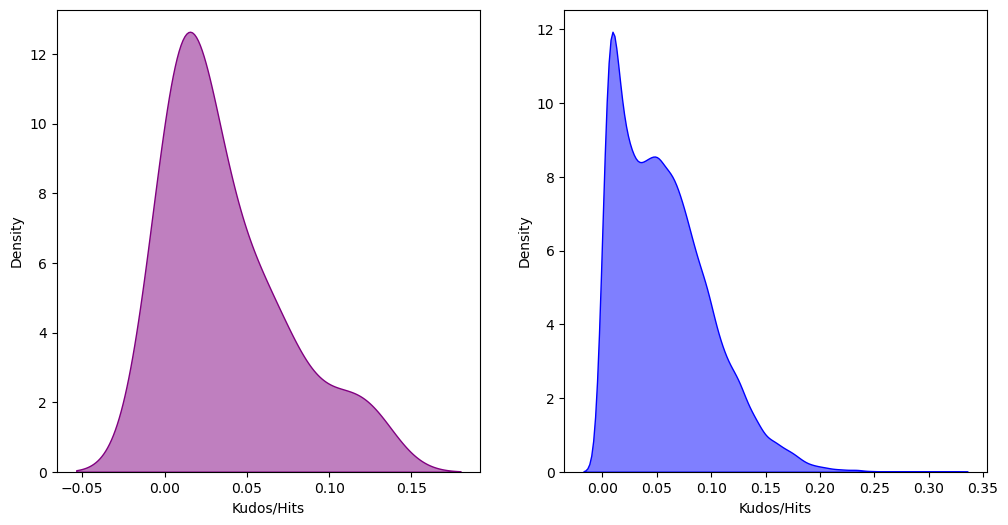

In [17]:
# create a kde plot of Kudos/Hits ratio for high and low novelty works
# put them both on the same plot in different grid cells
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# create kudos/hits ratio column
high_novelty_df['Kudos/Hits'] = high_novelty_df['Kudos'] / high_novelty_df['Hits']
low_novelty_df['Kudos/Hits'] = low_novelty_df['Kudos'] / low_novelty_df['Hits']
print(len(high_novelty_df), len(low_novelty_df))
sns.kdeplot(data=high_novelty_df, x='Kudos/Hits', ax=ax[0], fill=True, alpha=0.5, color='purple')
sns.kdeplot(data=low_novelty_df, x='Kudos/Hits', ax=ax[1], fill=True, alpha=0.5, color='blue')

In [9]:
os.chdir('../lda_merged_chs_20211216_no_crossover/')

In [10]:
lda_df = pd.read_csv('attack_on_titan_lda_with_dist_merged_chs_no_crossover_20211216.tsv', sep='\t', header=0, index_col=0)

In [11]:
lda_df.head()

,AdditionalTags,ArchiveWarnings,Author,Category,Chapters,Characters,Fandoms,Kudos,Language,Rating,...,Words,PublishDate,UpdateDate,CompleteDate,Comments,Hits,Bookmarks,URL,Dist,JSD
index,,,,,,,,,,,,,,,,,,,,,
132,"AU universe, Alternate Universe",Creator Chose Not To Use Archive Warnings,xnostalgic,F/M,1,"Armin Arlert, Annie Leonhart",['Shingeki no Kyojin | Attack on Titan'],28.0,English,Teen And Up Audiences,...,665.0,2013-11-16,NaN,2013-11-16,3,555.0,2,http://archiveofourown.org/works/1046284,"[2.5059275e-05, 2.5059275e-05, 2.5059275e-05, ...",0.455671
270,"AU, Reincarnation, Modern/Futuristic, some gor...","Creator Chose Not To Use Archive Warnings, Gra...",without_mission,GenF/MM/MF/FMulti,24,"Ensemble, Minor Characters, major characters, ...",['Shingeki no Kyojin | Attack on Titan'],801.0,English,Mature,...,171782.0,2013-11-20,NaN,2014-06-09,206,477216.0,5256,http://archiveofourown.org/works/1052149/chapt...,"[0.0008549195, 0.0020295654, 0.0033067295, 0.0...",0.117147
304,"AU, angst with happy ending, working up toward...",Creator Chose Not To Use Archive Warnings,litathesissy,M/M,1,"Levi (Shingeki no Kyojin), Eren Yeager, Armin ...",['Shingeki no Kyojin | Attack on Titan'],60.0,English,Mature,...,2061.0,2013-11-02,2013-11-02,NaN,0,1376.0,11,http://archiveofourown.org/works/1028140?view_...,"[7.767201e-06, 7.767201e-06, 7.767201e-06, 0.0...",0.287689
321,"AU, impending doom, Happy Ending, I promise, n...",Creator Chose Not To Use Archive Warnings,MadameRed,Multi,1,"Jean Kirschtein, Marco Bodt, Mikasa Ackerman, ...",['Shingeki no Kyojin | Attack on Titan'],200.0,English,Teen And Up Audiences,...,2511.0,2013-11-21,NaN,2013-11-21,35,2490.0,37,http://archiveofourown.org/works/1053017,"[7.1969134e-06, 7.1969134e-06, 7.1969134e-06, ...",0.279201
341,"AU, tw:blood, Tw:Cutting","Graphic Depictions Of Violence, Major Characte...",AttackOnHomestuck,M/MF/F,1,"Eren Yeager, Levi (Shingeki no Kyojin), Carla ...",['Shingeki no Kyojin | Attack on Titan'],19.0,English,Mature,...,3362.0,2013-11-26,2013-11-25,NaN,0,331.0,1,http://archiveofourown.org/works/1058881?view_...,"[0.012024406, 0.008680186, 0.08618525, 5.32084...",0.399624


In [12]:
lda_df.columns

Index(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Category', 'Chapters',
       'Characters', 'Fandoms', 'Kudos', 'Language', 'Rating', 'Relationship',
       'Title', 'Words', 'PublishDate', 'UpdateDate', 'CompleteDate',
       'Comments', 'Hits', 'Bookmarks', 'URL', 'Dist', 'JSD'],
      dtype='object')

In [26]:
# remove 0 and  nan values
lda_df.dropna(subset=['JSD', 'Kudos', 'Hits'],inplace=True)
lda_df = lda_df[lda_df['JSD'] != 0]
lda_df = lda_df[lda_df['Kudos'] != 0]
lda_df = lda_df[lda_df['Hits'] != 0]

print(lda_df["JSD"].mean())


# create a df only including rows with Cos >= 0.5
high_novelty_df = lda_df[lda_df['JSD'] >= 0.5]
# create a df only including rows with Cos < 0.5
low_novelty_df = lda_df[lda_df['JSD'] < 0.5]
print(len(high_novelty_df), len(low_novelty_df))

0.345212069345422
2252 17886


2252 17886


/tmp/ipykernel_10149/1202386228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_novelty_df['Kudos/Hits'] = high_novelty_df['Kudos'] / high_novelty_df['Hits']
/tmp/ipykernel_10149/1202386228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_novelty_df['Kudos/Hits'] = low_novelty_df['Kudos'] / low_novelty_df['Hits']


<AxesSubplot: xlabel='Kudos/Hits', ylabel='Density'>

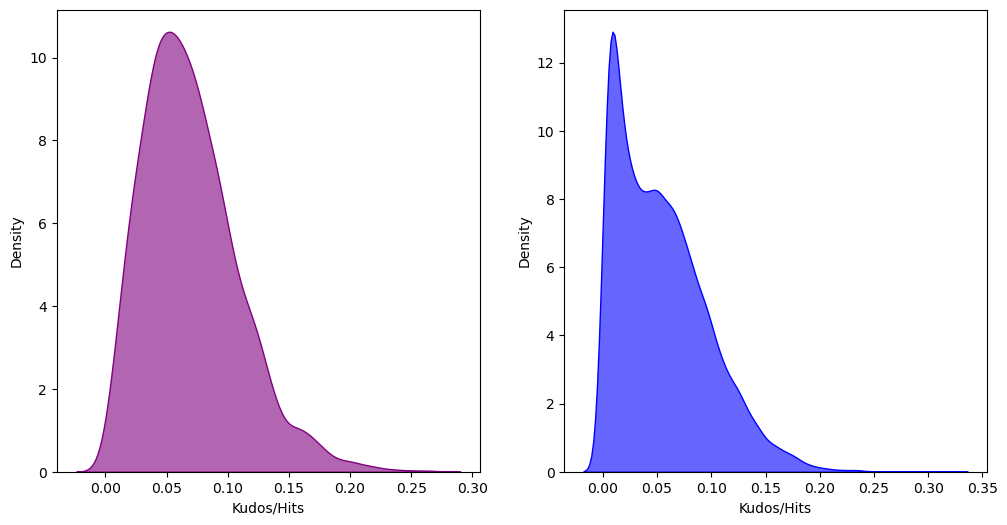

In [28]:
# create a kde plot of Kudos/Hits ratio for high and low novelty works
# put them both on the same plot in different grid cells
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# create kudos/hits ratio column
high_novelty_df['Kudos/Hits'] = high_novelty_df['Kudos'] / high_novelty_df['Hits']
low_novelty_df['Kudos/Hits'] = low_novelty_df['Kudos'] / low_novelty_df['Hits']
print(len(high_novelty_df), len(low_novelty_df))
sns.kdeplot(data=high_novelty_df, x='Kudos/Hits', ax=ax[0], fill=True, alpha=0.6, color='purple')
sns.kdeplot(data=low_novelty_df, x='Kudos/Hits', ax=ax[1], fill=True, alpha=0.6, color='blue')